## Image classification

1.import different libraries - TensorFlow -tensorflow.keras-Numpy-Matplotlib.pyplot

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import numpy as np
import matplotlib.pyplot as plt

2.Load dataset

In [2]:
(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()

In [3]:
xtrain.shape

(50000, 32, 32, 3)

In [4]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
xtrain=xtrain/255
xtest=xtest/255

In [6]:
xtrain[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

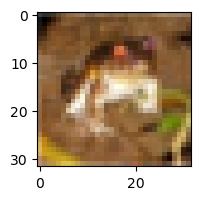

In [7]:
plt.figure(figsize=(2,2))
plt.imshow(xtrain[0])

In [8]:
xtrain.reshape(-1,)

array([0.23137255, 0.24313725, 0.24705882, ..., 0.63921569, 0.63921569,
       0.63137255])

we can do link this also
xtrain.flatten()

In [9]:
# xtrain.flatten()

In [10]:
xtest.reshape(-1,)

array([0.61960784, 0.43921569, 0.19215686, ..., 0.10588235, 0.10196078,
       0.10196078])

In [11]:
ann_model=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                            layers.Dense(3000,activation='relu'),
                            layers.Dense(1000,activation='relu'),
                            layers.Dense(10,activation='softmax')])

use 2d model and use the max pooling

In [12]:
# ann_model=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
#                             layers.Dense(3000,activation='relu'),
#                             layers.Dense(1000,activation='relu'),
#                             layers.Dense(10,activation='softmax')])

In [13]:
ann_model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
ann_model.fit(xtrain,ytrain)



1563/1563 [==============================] - 27s 17ms/step - loss: 1.8102 - accuracy: 0.3530


In [15]:
ann_model.fit(xtrain,ytrain,epochs=2)

Epoch 1/2
1563/1563 [==============================] - 25s 16ms/step - loss: 1.6212 - accuracy: 0.4282
Epoch 2/2
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5407 - accuracy: 0.4559


In [16]:
ann_model.save("newmodel.h5")

d:\New folder\envs\ds_env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
import tensorflow as tf
from PIL import Image
import numpy as np

model = tf.keras.models.load_model('./newmodel.h5')

image_path = './ann_10_objdetection/ann_10_objdetection/DEER.jpeg'
image = Image.open(image_path)
image = image.resize((32, 32))  
image = np.array(image) / 255.0  
image = np.expand_dims(image, axis=0)  

predictions = model.predict(image)

predicted_class = np.argmax(predictions)
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 37ms/step
Predicted class: 2
